In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import seaborn as sns
import sklearn
import imblearn
import matplotlib.pyplot as plt
import time
import sklearn.metrics as m
import xgboost as xgb
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
#Load Data
df=pd.read_csv('datasets/MachineLearningCVE/combined data/combined_data_new_0306.csv')

In [4]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

X = df.drop(columns=['Label'], axis=1)
y = df['Label']

# Initial train test split set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split training set into training (70%) and validation (10%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (63423, 42)
Validation set shape: (7047, 42)
Testing set shape: (17618, 42)


### Xgboost

In [5]:
# import torch
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

# Training
xgb_start_train = time.time()
model_xgb = xgb.XGBClassifier(
    early_stopping_rounds=10,
    # device = device
)

# cupy_X_train = cupy.array(X_train)
# cupy_X_test = cupy.array(X_test)
# cupy_X_val = cupy.array(X_val)
# cupy_y_train = cupy.array(y_train)
# cupy_y_test = cupy.array(y_test)
# cupy_y_val = cupy.array(y_val)

model_xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
xgb_end_train = time.time()
xgb_training_time = xgb_end_train - xgb_start_train



In [7]:
# Testing
xgb_start_test = time.time()
y_pred_xgb = model_xgb.predict(X_test)
acc_test_xgb = accuracy_score(y_test, y_pred_xgb)
recall_score_test_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
xgb_end_test = time.time()
xgb_testing_time = xgb_end_test - xgb_start_test


# Validation
xgb_start_validation = time.time()
xgb_y_val =  model_xgb.predict(X_val)
xgb_val_acc = accuracy_score(y_val, xgb_y_val)
recall_score_val_xgb = recall_score(y_val, xgb_y_val, average='weighted')
xgb_end_validation = time.time()
xgb_validation_time = xgb_end_validation - xgb_start_validation

# Results
print("XGBoost Classifier")
print("Accuracy: ", acc_test_xgb)
print("Recall: ", recall_score_test_xgb)
print("Validation Accuracy: ", xgb_val_acc)
print("Validation Recall: ", recall_score_val_xgb)
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred_xgb))
print("Classification report: \n", classification_report(y_test, y_pred_xgb))

XGBoost Classifier
Accuracy:  0.9885912135316154
Recall:  0.9885912135316154
Validation Accuracy:  0.9917695473251029
Validation Recall:  0.9917695473251029
Confusion matrix: 
 [[1355    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0 1355    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 1354    0    1    0    0    0    0    0    0    0    0]
 [   0    0    0 1356    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0 1354    0    0    0    0    0    1    0    0]
 [   0    0    0    2    0 1350    3    0    0    0    0    0    0]
 [   0    0    0    0    0    4 1352    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 1355    0    0    0    0    0]
 [   0    1    0    0    1    0    0    0 1353    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 1355    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 1256    0  100]
 [   0    0    0    0    0    0    0    0    0    0    0 1355    0]
 [   0 

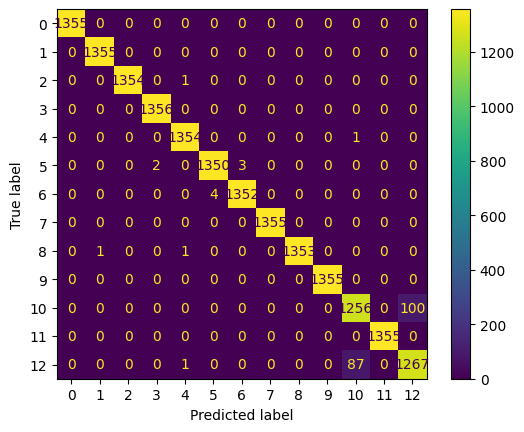

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_xgb, labels=model_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_xgb.classes_,
                              #cmap = plt.cm.Blues
                              )
disp.plot()

plt.show()

### RandomForest

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Training
randomforest_start_train = time.time()
model_randomforest = RandomForestClassifier(n_estimators=100,n_jobs = -1,random_state =50, min_samples_leaf = 10)

model_randomforest.fit(X_train, y_train)
randomforest_end_train = time.time()
randomforest_training_time = xgb_end_train - xgb_start_train

In [10]:
# Testing
randomforest_start_test = time.time()
y_pred_randomforest = model_randomforest.predict(X_test)
acc_test_randomforest = accuracy_score(y_test, y_pred_randomforest)
recall_score_test_randomforest = recall_score(y_test, y_pred_randomforest, average='weighted')
randomforest_end_test = time.time()
randomforest_testing_time = randomforest_end_test - randomforest_start_test


# Validation
randomforest_start_validation = time.time()
randomforest_y_val =  model_randomforest.predict(X_val)
randomforest_val_acc = accuracy_score(y_val, randomforest_y_val)
recall_score_val_randomforest = recall_score(y_val, randomforest_y_val, average='weighted')
randomforest_end_validation = time.time()
randomforest_validation_time = randomforest_end_validation - randomforest_start_validation

# Results
print("randomforest Classifier")
print("Accuracy: ", acc_test_randomforest)
print("Recall: ", recall_score_test_randomforest)
print("Validation Accuracy: ", randomforest_val_acc)
print("Validation Recall: ", recall_score_val_randomforest)
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred_randomforest))
print("Classification report: \n", classification_report(y_test, y_pred_randomforest))

randomforest Classifier
Accuracy:  0.9917130207742082
Recall:  0.9917130207742082
Validation Accuracy:  0.9937562083155953
Validation Recall:  0.9937562083155953
Confusion matrix: 
 [[1355    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0 1355    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 1353    0    1    0    0    1    0    0    0    0    0]
 [   0    0    0 1355    1    0    0    0    0    0    0    0    0]
 [   0    0    0    2 1351    0    2    0    0    0    0    0    0]
 [   0    0    0    2    0 1348    5    0    0    0    0    0    0]
 [   0    0    0    0    0    0 1356    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 1355    0    0    0    0    0]
 [   0    0    1    0    2    0    0    0 1351    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0 1354    0    1    0]
 [   0    0    0    0    0    0    0    0    0    0 1294    0   62]
 [   0    0    0    0    0    0    0    0    0    1    0 1354    0]
 [

### SVM

In [11]:
from sklearn import svm

# Training
svm_start_train = time.time()
model_svm = svm.SVC(decision_function_shape='ovo')

model_svm.fit(X_train, y_train)
svm_end_train = time.time()
svm_time = svm_end_train - svm_start_train

In [12]:
# Testing
svm_start_test = time.time()
y_pred_svm = model_svm.predict(X_test)
acc_test_svm = accuracy_score(y_test, y_pred_svm)
recall_score_test_svm = recall_score(y_test, y_pred_svm, average='weighted')
svm_end_test = time.time()
svm_testing_time = svm_end_test - svm_start_test


# Validation
svm_start_validation = time.time()
svm_y_val =  model_svm.predict(X_val)
svm_val_acc = accuracy_score(y_val, svm_y_val)
recall_score_val_svm = recall_score(y_val, svm_y_val, average='weighted')
svm_end_validation = time.time()
svm_validation_time = svm_end_validation - svm_start_validation

# Results
print("randomforest Classifier")
print("Accuracy: ", acc_test_svm)
print("Recall: ", recall_score_test_svm)
print("Validation Accuracy: ", svm_val_acc)
print("Validation Recall: ", recall_score_val_svm)
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred_svm))
print("Classification report: \n", classification_report(y_test, y_pred_svm))

randomforest Classifier
Accuracy:  0.659779770689068
Recall:  0.659779770689068
Validation Accuracy:  0.6547467007237122
Validation Recall:  0.6547467007237122
Confusion matrix: 
 [[1355    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0  375    0    0    0    0    0    0   32    0    0  948    0]
 [   0  154  407    0   45    0    0    0    1    0   13  423  312]
 [ 136    7    0 1187    0    2   18    2    0    0    0    4    0]
 [   2    6    4    2 1119    1    0    0    5    0    0  214    2]
 [   0    0   54   69    0 1106   55    0   10    0    0   61    0]
 [   0    0    0    6    0   16 1198    0    3    0    0  124    9]
 [   0    0    0    0    0    0    0  816    0    0    0  539    0]
 [   0    0    0    0    0    0    6    0   14    0    0 1334    1]
 [   0    0    0    0    0    0    0    0    0 1319    0   36    0]
 [   0    0    0   70    0    0    0    0    0    0   75  114 1097]
 [   0    0    0    0    0    0    0    0    0    0    0 1355    0]
 [  

### DecisionTree

In [13]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
# Testing
dt_start_test = time.time()
y_pred_dt = model_dt.predict(X_test)
acc_test_dt = accuracy_score(y_test, y_pred_dt)
recall_score_test_dt = recall_score(y_test, y_pred_dt, average='weighted')
dt_end_test = time.time()
dt_testing_time = dt_end_test - dt_start_test


# Validation
dt_start_validation = time.time()
dt_y_val =  model_dt.predict(X_val)
dt_val_acc = accuracy_score(y_val, dt_y_val)
recall_score_val_dt = recall_score(y_val, dt_y_val, average='weighted')
dt_end_validation = time.time()
dt_validation_time = dt_end_validation - dt_start_validation

# Results
print("DecisionTree Classifier")
print("Accuracy: ", acc_test_dt)
print("Recall: ", recall_score_test_dt)
print("Validation Accuracy: ", dt_val_acc)
print("Validation Recall: ", recall_score_val_dt)
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred_dt))
print("Classification report: \n", classification_report(y_test, y_pred_dt))

DecisionTree Classifier
Accuracy:  0.9916562606425247
Recall:  0.9916562606425247
Validation Accuracy:  0.9936143039591315
Validation Recall:  0.9936143039591315
Confusion matrix: 
 [[1355    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0 1355    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 1354    0    1    0    0    0    0    0    0    0    0]
 [   0    0    0 1355    0    0    0    0    1    0    0    0    0]
 [   0    0    0    0 1354    0    0    0    1    0    0    0    0]
 [   0    0    0    2    0 1352    1    0    0    0    0    0    0]
 [   0    0    0    0    0    0 1356    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 1355    0    0    0    0    0]
 [   0    0    0    0    1    0    0    0 1354    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 1355    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 1279    0   77]
 [   0    0    0    0    0    0    0    0    0    0    0 1355    0]
 [

### LogisticRegression

In [15]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)


LogisticRegression()

In [16]:
# Testing
lr_start_test = time.time()
y_pred_lr = model_lr.predict(X_test)
acc_test_lr = accuracy_score(y_test, y_pred_lr)
recall_score_test_lr = recall_score(y_test, y_pred_lr, average='weighted')
lr_end_test = time.time()
lr_testing_time = lr_end_test - lr_start_test


# Validation
lr_start_validation = time.time()
lr_y_val =  model_lr.predict(X_val)
lr_val_acc = accuracy_score(y_val, lr_y_val)
recall_score_val_lr = recall_score(y_val, lr_y_val, average='weighted')
lr_end_validation = time.time()
lr_validation_time = lr_end_validation - lr_start_validation

# Results
print("Logistic Regression")
print("Accuracy: ", acc_test_lr)
print("Recall: ", recall_score_test_lr)
print("Validation Accuracy: ", lr_val_acc)
print("Validation Recall: ", recall_score_val_lr)
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression
Accuracy:  0.5996140311045521
Recall:  0.5996140311045521
Validation Accuracy:  0.5972754363558961
Validation Recall:  0.5972754363558961
Confusion matrix: 
 [[1239    0    0  116    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  443  487    0  425    0    0    0    0]
 [ 458    0  711   11   26    0    0    0  147    0    1    0    1]
 [ 128    0   26 1156    0   17   27    2    0    0    0    0    0]
 [  79    2   30   26 1105   11    4    2   69    0   19    0    8]
 [   6    0    0  210    0 1023   35    0   25    0    2    0   54]
 [   0    1   46   52    0  456  720    0   81    0    0    0    0]
 [   0    0    0    0    0    0    0  816  539    0    0    0    0]
 [   0    1    1    0    0    0    7    0 1341    0    1    0    4]
 [   0    0    0    0    0    0    0    0   36 1319    0    0    0]
 [   0    0    0   70    0    0    0    0  114   68 1097    0    7]
 [   0    0    0    0    0    0    0    0 1355    0    0    0    0]
 [   0